In [1]:
import pickle
import copy
from experiments import *
from utils import *

Definitions

In [2]:
scenarios = {'boolq:':['boolq:'],
             #'civil_comments':['civil_comments:demographic=LGBTQ,',
             #                  'civil_comments:demographic=all,',
             #                  'civil_comments:demographic=black,',
             #                  'civil_comments:demographic=christian,',
             #                  'civil_comments:demographic=female,',
             #                  'civil_comments:demographic=male,',
             #                  'civil_comments:demographic=muslim,',
             #                  'civil_comments:demographic=other_religions,',
             #                  'civil_comments:demographic=white,'],
             'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,':['commonsense:dataset=hellaswag,method=multiple_choice_separate_original,'],
             'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,':['commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,'],
             'imdb:':['imdb:'],
             'mmlu':['mmlu:subject=abstract_algebra,method=multiple_choice_joint,',
                     'mmlu:subject=college_chemistry,method=multiple_choice_joint,',
                     'mmlu:subject=computer_security,method=multiple_choice_joint,',
                     'mmlu:subject=econometrics,method=multiple_choice_joint,',
                     'mmlu:subject=us_foreign_policy,method=multiple_choice_joint,'],
             'msmarco:track=regular,valid_topk=30,':['msmarco:track=regular,valid_topk=30,'],
             #'msmarco:track=trec,valid_topk=30,':['msmarco:track=trec,valid_topk=30,'],
             'narrative_qa:':['narrative_qa:'],
             'natural_qa:mode=closedbook,':['natural_qa:mode=closedbook,'],
             'natural_qa:mode=openbook_longans,':['natural_qa:mode=openbook_longans,'],
             'quac:':['quac:'],
             'raft':['raft:subset=ade_corpus_v2,',
                     'raft:subset=banking_77,',
                     'raft:subset=neurips_impact_statement_risks,',
                     'raft:subset=one_stop_english,',
                     'raft:subset=overruling,',
                     'raft:subset=semiconductor_org_types,',
                     'raft:subset=systematic_review_inclusion,',
                     'raft:subset=tai_safety_research,',
                     'raft:subset=terms_of_service,',
                     'raft:subset=tweet_eval_hate,',
                     'raft:subset=twitter_complaints,'],
             'truthful_qa:task=mc_single,method=multiple_choice_joint,':['truthful_qa:task=mc_single,method=multiple_choice_joint,']}
            
scenarios_metrics = {'boolq:':'em', 
                     'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,':'em',
                     'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,':'em',
                     'imdb:':'em', 
                     'mmlu':'em', 
                     'msmarco:track=regular,valid_topk=30,':'RR@10', 
                     'msmarco:track=trec,valid_topk=30,':'NDCG@10', 
                     'narrative_qa:':'f1', 
                     'natural_qa:mode=closedbook,':'f1', 
                     'natural_qa:mode=openbook_longans,':'f1', 
                     'quac:':'f1', 
                     'raft':'em', 
                     'truthful_qa:task=mc_single,method=multiple_choice_joint,':'em'}

## Data

Loading data

In [3]:
with open('data/helm.pickle', 'rb') as handle:
    data = pickle.load(handle)

## Results

In [4]:
device = 'cuda'
iterations = 10
Ds = [1, 5, 10, 15, 20]

num_elements = 4
set_of_rows = create_sublists_corrected(list(range(len(data['models']))), num_elements)
set_of_rows

[[0, 1, 2, 3],
 [4, 5, 6, 7],
 [8, 9, 10, 11],
 [12, 13, 14, 15],
 [16, 17, 18, 19],
 [20, 21, 22, 23],
 [24, 25, 26, 27]]

### Predicting accuracy

Full (one IRT model for all scenarios)

In [5]:
scenario_name = 'full' #we are evaluating all scenarios at once
chosen_scenarios = list(scenarios.keys())
results_full = evaluate_scenarios(data, scenario_name, chosen_scenarios, scenarios, set_of_rows, Ds, iterations, device)

  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 15 [0.03619480557026931, 0.0322894797610982, 0.030790057874523102, 0.02955177666690072, 0.030129005005864965] 



 14%|█████▊                                   | 1/7 [21:40<2:10:04, 1300.68s/it]


D 15 [0.03665824407878903, 0.032102994517865475, 0.031121401133389587, 0.031041577994231812, 0.03131406428578174] 



 29%|███████████▋                             | 2/7 [43:39<1:49:16, 1311.24s/it]


D 20 [0.03853254666472429, 0.03371044190870858, 0.03232779278017129, 0.0334928455834757, 0.03176347310648275] 



 43%|████████████████▋                      | 3/7 [1:06:52<1:29:54, 1348.58s/it]


D 15 [0.03775376496002547, 0.0348909059281163, 0.03405167230305627, 0.03254480941830818, 0.03287949853991493] 



 57%|██████████████████████▎                | 4/7 [1:28:40<1:06:38, 1332.68s/it]


D 15 [0.03421997001524584, 0.0337326973645993, 0.03487713637534257, 0.03106552876994503, 0.03166909466331733] 



 71%|█████████████████████████████▎           | 5/7 [1:50:28<44:07, 1323.70s/it]


D 15 [0.0370771204353525, 0.03663307853684391, 0.03574307097450891, 0.03471795973352033, 0.03710143293231056] 



 86%|███████████████████████████████████▏     | 6/7 [2:12:26<22:01, 1321.67s/it]


D 15 [0.04370085905674512, 0.04237385034821204, 0.041341231596573956, 0.037465364895307766, 0.03765775374500317] 



100%|█████████████████████████████████████████| 7/7 [2:33:56<00:00, 1319.55s/it]


In [6]:
with open('results/results_full_helm.pickle', 'wb') as handle:
    pickle.dump(results_full, handle, protocol=pickle.HIGHEST_PROTOCOL)

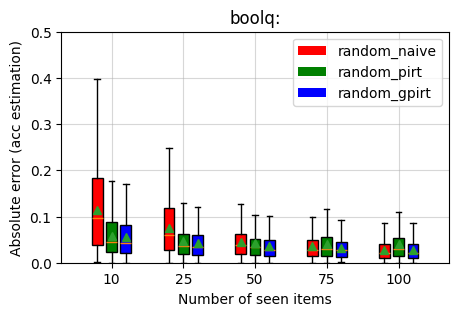

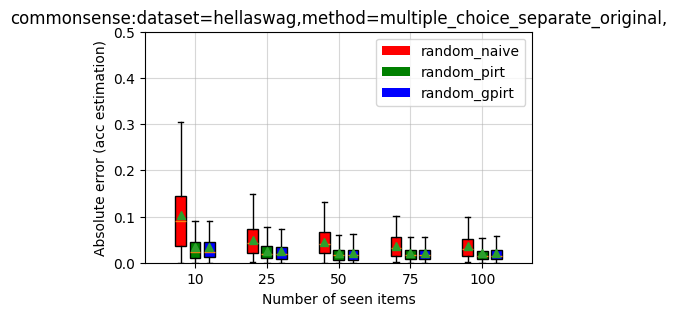

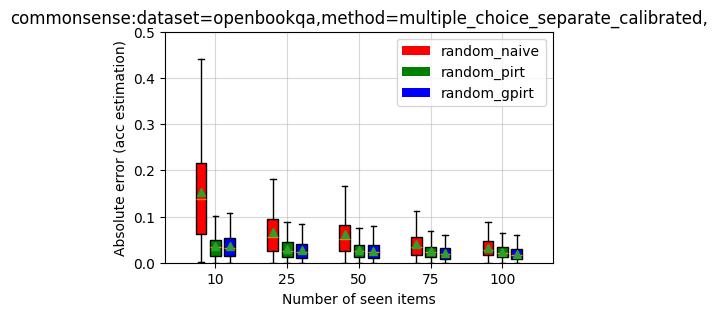

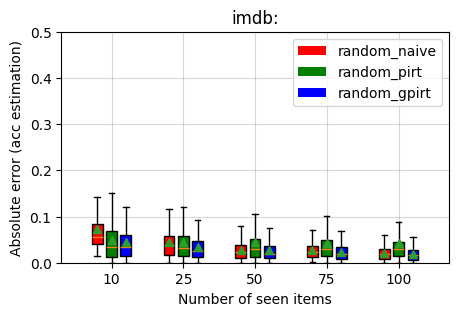

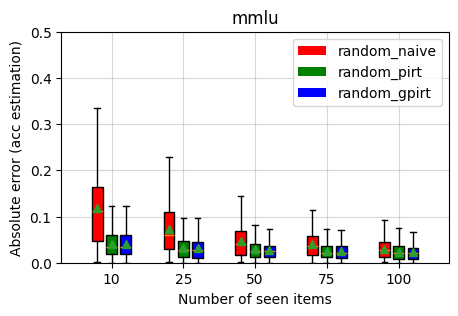

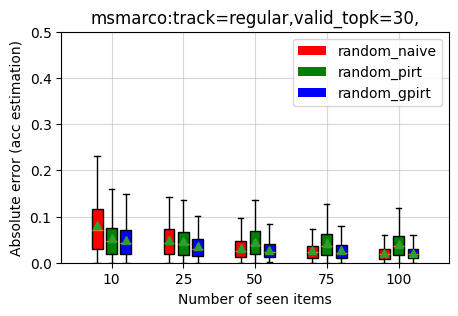

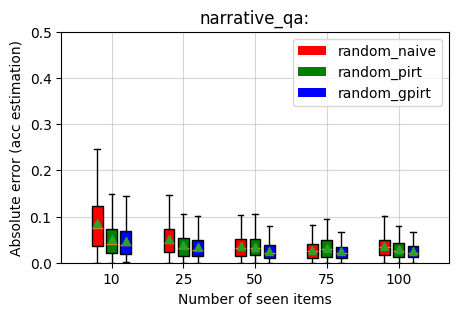

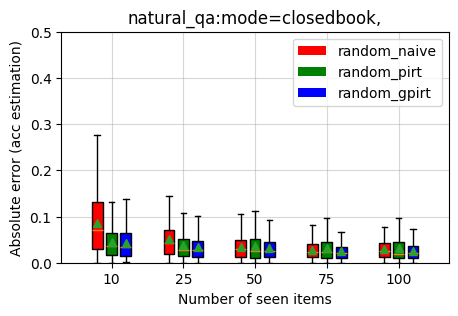

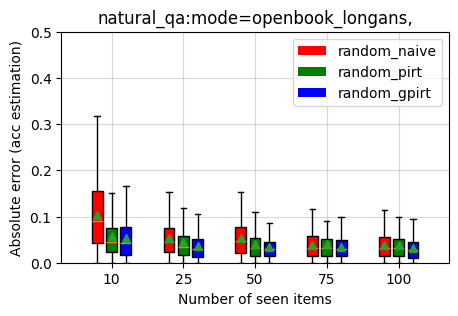

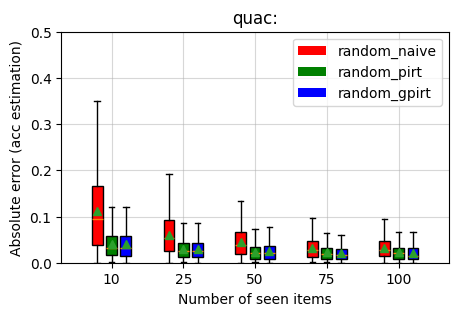

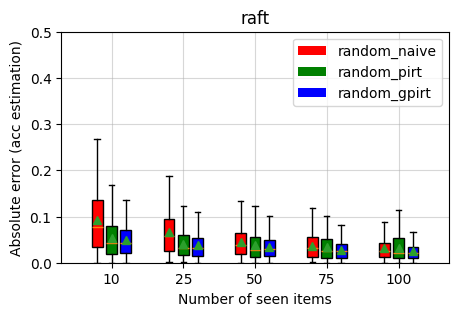

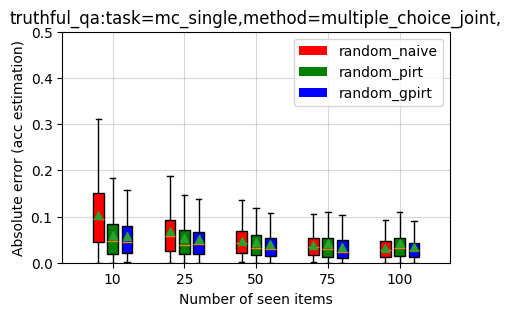

In [7]:
plot_results(results_full, scenarios.keys())

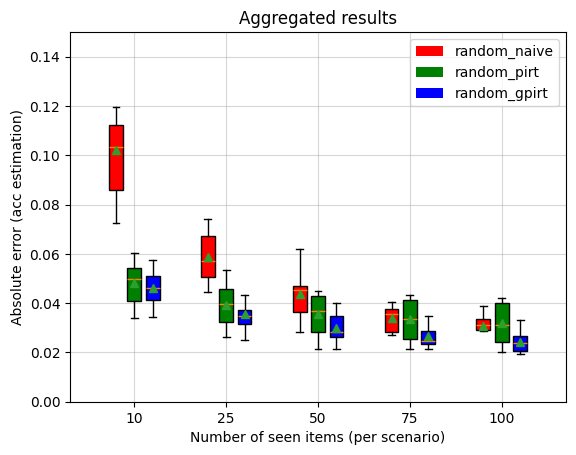

In [8]:
plot_agg_results(results_full, scenarios.keys())

Partial (one IRT model for each scenario)

In [9]:
results_partial = {}

for scenario in scenarios.keys():
    print("\n",scenario,"\n")
    scenario_name = scenario
    chosen_scenarios = [scenario]
    results_partial[scenario] = evaluate_scenarios(data, scenario_name, chosen_scenarios, scenarios, set_of_rows, Ds, iterations, device)


 boolq: 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 5 [0.0391447890028075, 0.01621571456820576, 0.0185528115123623, 0.01749695628662052, 0.019999148709897434] 



 14%|██████▎                                     | 1/7 [08:54<53:29, 534.85s/it]


D 15 [0.0313922739011231, 0.015015448766504132, 0.01450887509643007, 0.012725943992798666, 0.020226021633296093] 



 29%|████████████▌                               | 2/7 [18:04<45:16, 543.29s/it]


D 15 [0.041046555029656526, 0.01998543658593184, 0.019644932606348822, 0.01725720707111006, 0.02169867171640401] 



 43%|██████████████████▊                         | 3/7 [27:34<37:02, 555.72s/it]


D 15 [0.04040352308953419, 0.018225806457008192, 0.019353484194714006, 0.016654260545188544, 0.020374016170767888] 



 57%|█████████████████████████▏                  | 4/7 [36:40<27:36, 552.03s/it]


D 5 [0.07002449306692238, 0.010436097548087442, 0.012218168840212554, 0.01286131684135182, 0.010557985881327711] 



 71%|███████████████████████████████▍            | 5/7 [45:29<18:06, 543.40s/it]


D 5 [0.0637253580788669, 0.012978771845211054, 0.013984467379185059, 0.017515333226332475, 0.015911441811084642] 



 86%|█████████████████████████████████████▋      | 6/7 [54:43<09:07, 547.29s/it]


D 10 [0.07152176037241827, 0.013762314562781847, 0.01305481468436022, 0.016955991199704007, 0.013602226992913094] 



100%|██████████████████████████████████████████| 7/7 [1:04:09<00:00, 549.90s/it]



 commonsense:dataset=hellaswag,method=multiple_choice_separate_original, 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 5 [0.013472925984166564, 0.013104313905484291, 0.013412802484092365, 0.020320570492779202, 0.01792893832742705] 



 14%|██████▎                                     | 1/7 [08:53<53:20, 533.34s/it]


D 5 [0.019220950893035882, 0.010840834681311404, 0.0142228312366834, 0.0147472500589374, 0.01288087428407271] 



 29%|████████████▌                               | 2/7 [17:30<43:39, 523.96s/it]


D 15 [0.019651646790248542, 0.010994913921398258, 0.010771853460795414, 0.007922663315184555, 0.015428543756502239] 



 43%|██████████████████▊                         | 3/7 [26:41<35:44, 536.04s/it]


D 10 [0.020549749953339233, 0.011882981031137552, 0.008711860919513412, 0.010344737702241702, 0.015311047453643103] 



 57%|█████████████████████████▏                  | 4/7 [35:36<26:47, 535.71s/it]


D 15 [0.021434359034450692, 0.009061093390205666, 0.00957492916773428, 0.006751278193939128, 0.008581857915584495] 



 71%|███████████████████████████████▍            | 5/7 [44:52<18:05, 542.96s/it]


D 10 [0.018866070412556293, 0.009355615582313355, 0.00903054948325517, 0.01014578296108807, 0.011795709173033346] 



 86%|█████████████████████████████████████▋      | 6/7 [54:06<09:06, 546.93s/it]


D 20 [0.015437634315892311, 0.009154554061049897, 0.007710795480093763, 0.01002886763071014, 0.0073689973264155564] 



100%|██████████████████████████████████████████| 7/7 [1:04:10<00:00, 550.12s/it]



 commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated, 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 10 [0.02743432308877819, 0.028244580766852392, 0.023290139496623917, 0.028921938828032158, 0.03363503079886196] 



 14%|██████▎                                     | 1/7 [08:21<50:08, 501.44s/it]


D 10 [0.020277426544103222, 0.027688926386849347, 0.018887151874080868, 0.02985141206718657, 0.031570787297650414] 



 29%|████████████▌                               | 2/7 [17:04<42:51, 514.25s/it]


D 1 [0.024841790013841625, 0.03248805183468519, 0.02884756562062881, 0.03926899091806934, 0.0353146757394444] 



 43%|██████████████████▊                         | 3/7 [25:32<34:05, 511.39s/it]


D 10 [0.026052891527093537, 0.029693898689961612, 0.023937180020158134, 0.03161114014514607, 0.032413769921771134] 



 57%|█████████████████████████▏                  | 4/7 [34:15<25:47, 515.93s/it]


D 20 [0.02880166442835331, 0.027330996918349615, 0.027972512969625732, 0.03514129745961206, 0.027159196318479795] 



 71%|███████████████████████████████▍            | 5/7 [43:47<17:52, 536.02s/it]


D 5 [0.02211615404375103, 0.021378808701628192, 0.026576462413205965, 0.03301392518331869, 0.037621768343447666] 



 86%|█████████████████████████████████████▋      | 6/7 [52:25<08:49, 529.87s/it]


D 1 [0.025617408705280544, 0.027735364383573796, 0.0297021597725717, 0.03178774650686481, 0.026648792714569394] 



100%|██████████████████████████████████████████| 7/7 [1:00:33<00:00, 519.09s/it]



 imdb: 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 5 [0.030482732358319733, 0.005898308152725018, 0.009324578552109608, 0.006478050161777826, 0.006303034612034311] 



 14%|██████▎                                     | 1/7 [08:55<53:33, 535.59s/it]


D 5 [0.02949886942966219, 0.006449803734967202, 0.010421031052222654, 0.006864301302692777, 0.009534533477678964] 



 29%|████████████▌                               | 2/7 [18:15<45:48, 549.72s/it]


D 20 [0.02468741003388425, 0.012626145563524954, 0.012488526060343619, 0.017119290182561794, 0.004851305220777938] 



 43%|██████████████████▊                         | 3/7 [28:00<37:44, 566.09s/it]


D 15 [0.03341070734975134, 0.02468667925557895, 0.015153972422234749, 0.01272286009163097, 0.014984737911290902] 



 57%|█████████████████████████▏                  | 4/7 [37:23<28:14, 564.83s/it]


D 10 [0.020412558729408253, 0.009269404894256358, 0.005302195607224197, 0.008352550358155894, 0.012345160211623726] 



 71%|███████████████████████████████▍            | 5/7 [46:20<18:29, 554.79s/it]


D 5 [0.02739887837870865, 0.007791422414773139, 0.01067758000863403, 0.017271065127986082, 0.016199791880473893] 



 86%|█████████████████████████████████████▋      | 6/7 [54:49<08:59, 539.01s/it]


D 5 [0.013877330295414242, 0.006909211122052686, 0.009057544857314734, 0.012223981086037186, 0.01224187734660169] 



100%|██████████████████████████████████████████| 7/7 [1:03:33<00:00, 544.76s/it]



 mmlu 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 10 [0.03178931321254619, 0.029304447956289673, 0.029301526177259708, 0.03210328700327825, 0.030164377750967607] 



 14%|██████▎                                     | 1/7 [08:25<50:34, 505.81s/it]


D 1 [0.022656866880381547, 0.026724152033478506, 0.02917572771760844, 0.03313694279979333, 0.034004559604389] 



 29%|████████████▌                               | 2/7 [16:39<41:34, 498.90s/it]


D 1 [0.0218273580671109, 0.029884546976325616, 0.02720675506502004, 0.028592921119446876, 0.028741879486531355] 



 43%|██████████████████▊                         | 3/7 [24:56<33:10, 497.69s/it]


D 20 [0.02202811862506446, 0.024033562142728736, 0.032082979189929736, 0.029425088591199102, 0.02150547204452031] 



 57%|█████████████████████████▏                  | 4/7 [34:34<26:28, 529.54s/it]


D 1 [0.020915295491759116, 0.03715741907036073, 0.02780616099066257, 0.03612227444626912, 0.02780763967844244] 



 71%|███████████████████████████████▍            | 5/7 [42:47<17:12, 516.39s/it]


D 1 [0.017410829630884195, 0.029865643111660335, 0.024860992994193434, 0.02994174171883823, 0.03015664062454223] 



 86%|█████████████████████████████████████▋      | 6/7 [51:34<08:40, 520.14s/it]


D 10 [0.03994523967817576, 0.03655204462422024, 0.026363226032257454, 0.0282702911945526, 0.0379646620462724] 



100%|██████████████████████████████████████████| 7/7 [1:00:27<00:00, 518.27s/it]



 msmarco:track=regular,valid_topk=30, 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 5 [0.01782994599264586, 0.01472848472117462, 0.026708219096090658, 0.03055267606440924, 0.04193769279516396] 



 14%|██████▎                                     | 1/7 [08:20<50:00, 500.08s/it]


D 5 [0.027634421452855357, 0.019977001487861357, 0.02599170361473092, 0.03293034106293198, 0.06702794137918527] 



 29%|████████████▌                               | 2/7 [17:29<44:05, 529.15s/it]


D 5 [0.02983871360236024, 0.02031255892769609, 0.03147283775790326, 0.03890671177423999, 0.03818717255229984] 



 43%|██████████████████▊                         | 3/7 [26:24<35:27, 531.76s/it]


D 5 [0.026501067857886113, 0.016389843410326364, 0.02096813038935981, 0.028352399787898417, 0.047615223097036516] 



 57%|█████████████████████████▏                  | 4/7 [35:13<26:31, 530.61s/it]


D 5 [0.02593611339677363, 0.024162421567595686, 0.02591396915611241, 0.03446524801388766, 0.04883268666366787] 



 71%|███████████████████████████████▍            | 5/7 [44:34<18:03, 541.67s/it]


D 5 [0.03064788646050487, 0.027948286348612503, 0.031174817798285133, 0.034280261791061854, 0.05681791861769544] 



 86%|█████████████████████████████████████▋      | 6/7 [53:30<08:59, 539.62s/it]


D 10 [0.0311011898800571, 0.029103327447323697, 0.02141667363985237, 0.02509668453581164, 0.055547980253751905] 



100%|██████████████████████████████████████████| 7/7 [1:02:55<00:00, 539.35s/it]



 narrative_qa: 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 1 [0.023085030156204424, 0.029033293147614596, 0.033705472698380104, 0.03435322962004337, 0.041171888758492134] 



 14%|██████▎                                     | 1/7 [08:09<48:55, 489.30s/it]


D 5 [0.025025826202195206, 0.02489858828199465, 0.02778238282994929, 0.029475937293981888, 0.045749329813405515] 



 29%|████████████▌                               | 2/7 [16:49<42:16, 507.32s/it]


D 1 [0.032840194650276294, 0.033919098795224464, 0.033138922921209256, 0.0393121411875788, 0.04684285944665112] 



 43%|██████████████████▊                         | 3/7 [25:36<34:25, 516.35s/it]


D 10 [0.03538596589991305, 0.042752672422845486, 0.03205654596551802, 0.03700344799461031, 0.04541126646927816] 



 57%|█████████████████████████▏                  | 4/7 [34:12<25:48, 516.19s/it]


D 10 [0.019841797657404306, 0.028763982448347193, 0.01558481483515571, 0.030306765924468272, 0.03085294298842301] 



 71%|███████████████████████████████▍            | 5/7 [43:23<17:37, 528.94s/it]


D 15 [0.019802538427199708, 0.02306002416595173, 0.018056224056520534, 0.013639829603045661, 0.031669038729544144] 



 86%|█████████████████████████████████████▋      | 6/7 [52:29<08:54, 534.74s/it]


D 15 [0.030489766753143854, 0.03171371064507636, 0.020410853076148802, 0.019398250015600305, 0.024677066303917344] 



100%|██████████████████████████████████████████| 7/7 [1:01:09<00:00, 524.16s/it]



 natural_qa:mode=closedbook, 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 5 [0.012212871569625241, 0.011560328951627062, 0.011793112394970598, 0.015853082415517344, 0.013777445565956978] 



 14%|██████▎                                     | 1/7 [08:56<53:40, 536.75s/it]


D 1 [0.01276324880083391, 0.013623946449167116, 0.01588935775682821, 0.016460689391557454, 0.01353129807161363] 



 29%|████████████▌                               | 2/7 [17:52<44:42, 536.42s/it]


D 5 [0.009371545908095604, 0.008586185512700333, 0.01133794695882457, 0.019110324290597853, 0.019725464686378365] 



 43%|██████████████████▊                         | 3/7 [26:36<35:22, 530.65s/it]


D 5 [0.011462598267547891, 0.010605410081884321, 0.012408135117492758, 0.017460893707734272, 0.023531270691974554] 



 57%|█████████████████████████▏                  | 4/7 [35:16<26:19, 526.35s/it]


D 1 [0.011647608097600825, 0.015505872717560633, 0.017328556676157125, 0.023068572276728122, 0.024819305113193475] 



 71%|███████████████████████████████▍            | 5/7 [43:25<17:06, 513.03s/it]


D 20 [0.012400423180505906, 0.015608662446462198, 0.015548942265069799, 0.022039444165259072, 0.010737124970471724] 



 86%|█████████████████████████████████████▋      | 6/7 [53:16<08:59, 539.33s/it]


D 1 [0.012504195493168007, 0.013752350198624495, 0.014945213368000159, 0.01748435938278748, 0.02095283251752785] 



100%|██████████████████████████████████████████| 7/7 [1:01:44<00:00, 529.23s/it]



 natural_qa:mode=openbook_longans, 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 5 [0.025257993928542985, 0.0212592991742145, 0.025007419704137557, 0.021958124709845254, 0.023477854169533907] 



 14%|██████▎                                     | 1/7 [08:29<50:54, 509.04s/it]


D 5 [0.033887304615907346, 0.03204921845132195, 0.03288098342349717, 0.033297937802916976, 0.03252758496286472] 



 29%|████████████▌                               | 2/7 [17:24<43:43, 524.70s/it]


D 1 [0.02929005303091134, 0.030827175190170836, 0.034730389164783625, 0.03252386526998192, 0.032641596434270746] 



 43%|██████████████████▊                         | 3/7 [26:11<35:01, 525.43s/it]


D 20 [0.03341482181078299, 0.03244175158299006, 0.02786738332393498, 0.03242206988207749, 0.027775652253612837] 



 57%|█████████████████████████▏                  | 4/7 [35:58<27:30, 550.07s/it]


D 15 [0.03332748918409164, 0.033424639903504125, 0.0394304556360059, 0.03298275765471466, 0.03422266527135582] 



 71%|███████████████████████████████▍            | 5/7 [44:44<18:02, 541.41s/it]


D 15 [0.042345284581178366, 0.04048308711586411, 0.040857383642168545, 0.030088515004007388, 0.04747068333610295] 



 86%|█████████████████████████████████████▋      | 6/7 [53:59<09:05, 545.74s/it]


D 5 [0.044321539718889906, 0.03882594820386855, 0.04252256604220226, 0.04370584489723839, 0.04616746123513035] 



100%|██████████████████████████████████████████| 7/7 [1:02:41<00:00, 537.36s/it]



 quac: 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 5 [0.015950671725463605, 0.014261383644924255, 0.016616405521957985, 0.01576498144978851, 0.020877700439722577] 



 14%|██████▎                                     | 1/7 [08:31<51:11, 511.85s/it]


D 15 [0.02024366428927915, 0.024140588272445515, 0.017322438638135616, 0.013277198229900658, 0.01576991799779035] 



 29%|████████████▌                               | 2/7 [17:25<43:42, 524.59s/it]


D 20 [0.02154717698277385, 0.015816748524142214, 0.019112572690295357, 0.015531548901928972, 0.01170229626975347] 



 43%|██████████████████▊                         | 3/7 [26:25<35:27, 531.77s/it]


D 20 [0.024750519272174816, 0.024856828913611274, 0.026653605798682714, 0.021321542359151034, 0.014300540197494951] 



 57%|█████████████████████████▏                  | 4/7 [36:17<27:46, 555.53s/it]


D 20 [0.038071486853807505, 0.025454601378297206, 0.0229053118747031, 0.020810990135328472, 0.016611369492339302] 



 71%|███████████████████████████████▍            | 5/7 [45:50<18:43, 561.93s/it]


D 15 [0.05030492139797436, 0.022524811593806985, 0.018755585373089384, 0.01398373853505195, 0.02132259801980993] 



 86%|█████████████████████████████████████▋      | 6/7 [55:05<09:19, 559.56s/it]


D 15 [0.03026113334476866, 0.017378804112449055, 0.019583370628413463, 0.012699704274348324, 0.015745250075809243] 



100%|██████████████████████████████████████████| 7/7 [1:04:06<00:00, 549.55s/it]



 raft 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 1 [0.022265865904717082, 0.033171134987666995, 0.02326245039853518, 0.0301198803835556, 0.02671960464964651] 



 14%|██████▎                                     | 1/7 [08:28<50:52, 508.76s/it]


D 20 [0.021585398590572097, 0.024770899954503683, 0.02091966649945083, 0.025459261078273974, 0.020584402301649277] 



 29%|████████████▌                               | 2/7 [18:11<45:59, 551.99s/it]


D 10 [0.019665261396678096, 0.02372603900424807, 0.01498441452663437, 0.025573073938939136, 0.033599523082504364] 



 43%|██████████████████▊                         | 3/7 [26:40<35:31, 532.78s/it]


D 20 [0.023917113909795687, 0.03316199532122663, 0.023798426575148607, 0.02902913522642199, 0.019763383116728914] 



 57%|█████████████████████████▏                  | 4/7 [36:33<27:48, 556.33s/it]


D 1 [0.011222074739113345, 0.027726840761435806, 0.025619492657399226, 0.0233560554534831, 0.025686462892185152] 



 71%|███████████████████████████████▍            | 5/7 [44:45<17:46, 533.31s/it]


D 1 [0.01858240460315152, 0.034493258503330994, 0.027489868573267164, 0.03485148293084403, 0.03056818783925728] 



 86%|█████████████████████████████████████▋      | 6/7 [53:42<08:54, 534.28s/it]


D 1 [0.018346427973056564, 0.021303486959712375, 0.03467511573806594, 0.02613842124558348, 0.021978404537741393] 



100%|██████████████████████████████████████████| 7/7 [1:02:23<00:00, 534.85s/it]



 truthful_qa:task=mc_single,method=multiple_choice_joint, 



  0%|                                                     | 0/7 [00:00<?, ?it/s]


D 20 [0.022045466876499636, 0.025716942076107772, 0.025220116980003333, 0.036659311175967546, 0.020986440064630883] 



 14%|██████▎                                     | 1/7 [09:37<57:43, 577.27s/it]


D 20 [0.032139777789259964, 0.030896470253500046, 0.02864815223122251, 0.03305149572986184, 0.02422144486870595] 



 29%|████████████▌                               | 2/7 [18:55<47:10, 566.06s/it]


D 10 [0.02798191505812556, 0.027350168567493203, 0.024047876176728756, 0.02755043123856684, 0.03282651003171903] 



 43%|██████████████████▊                         | 3/7 [27:47<36:42, 550.62s/it]


D 1 [0.022884069280847272, 0.0247377155524048, 0.025041980125292743, 0.023864889290824733, 0.02871106296336895] 



 57%|█████████████████████████▏                  | 4/7 [36:39<27:09, 543.24s/it]


D 5 [0.023938398104472354, 0.019976285775416647, 0.02068626287752889, 0.025196901419715246, 0.029853472870407013] 



 71%|███████████████████████████████▍            | 5/7 [44:44<17:24, 522.31s/it]


D 10 [0.03731692336081367, 0.02801081015765645, 0.024745864431782442, 0.029970451174973458, 0.04119804691651418] 



 86%|█████████████████████████████████████▋      | 6/7 [53:41<08:47, 527.11s/it]


D 15 [0.021308435251376327, 0.029326081840303147, 0.02345310154050685, 0.020979190955590015, 0.023789806142867735] 



100%|██████████████████████████████████████████| 7/7 [1:03:32<00:00, 544.62s/it]


In [10]:
with open('results/results_partial_helm.pickle', 'wb') as handle:
    pickle.dump(results_partial, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [38]:
#changing the format of results_partial
results_partial_processed = copy.deepcopy(results_partial[list(scenarios.keys())[0]])
for scenario in list(scenarios.keys())[1:]:
    for key1 in results_partial_processed.keys():    
        for key2 in results_partial_processed[key1].keys():
            for key3 in results_partial_processed[key1][key2].keys():
                results_partial_processed[key1][key2][key3][scenario] = results_partial[scenario][key1][key2][key3][scenario]

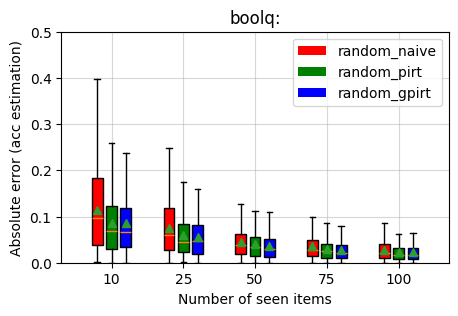

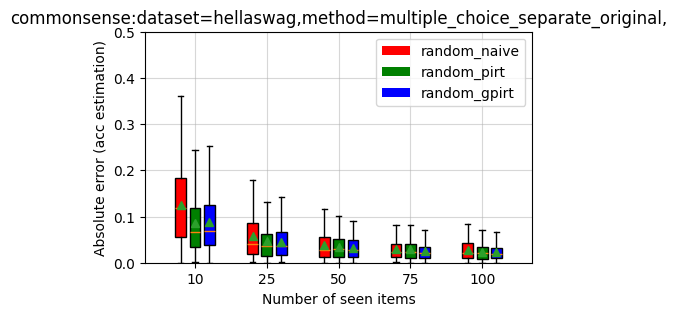

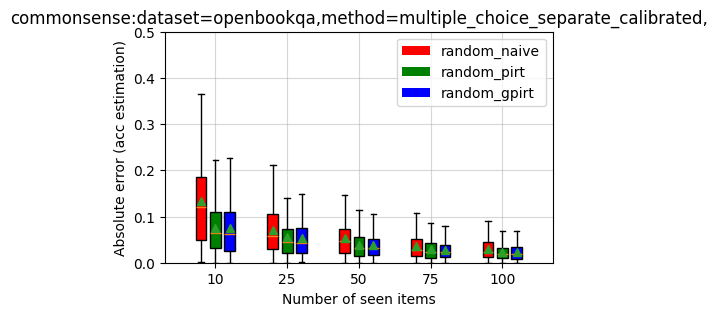

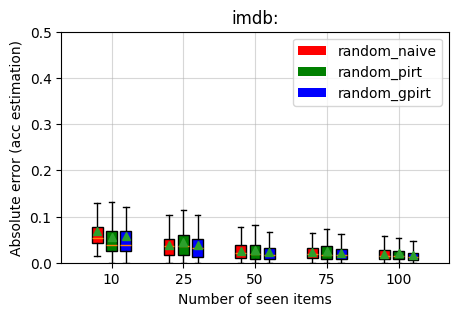

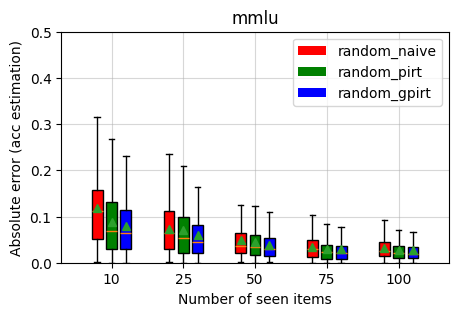

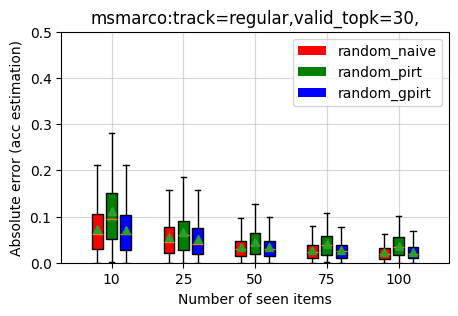

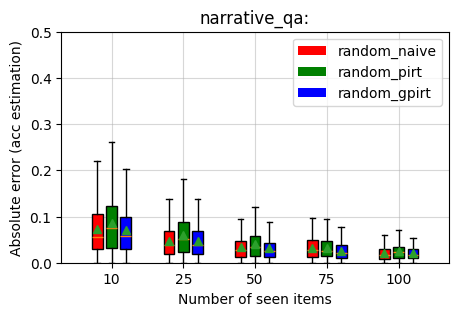

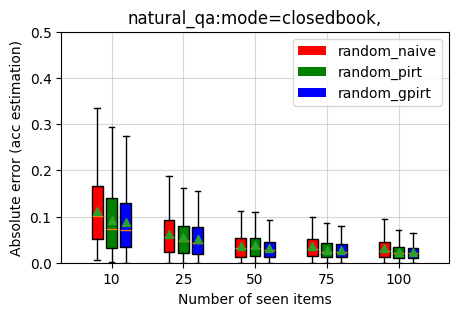

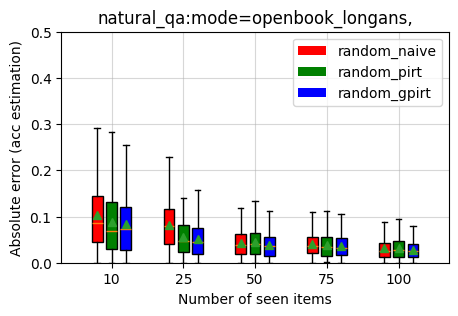

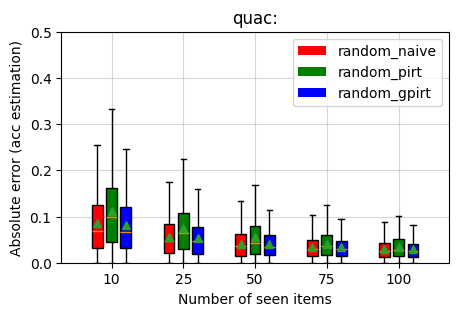

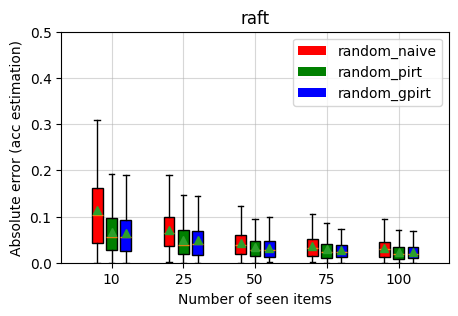

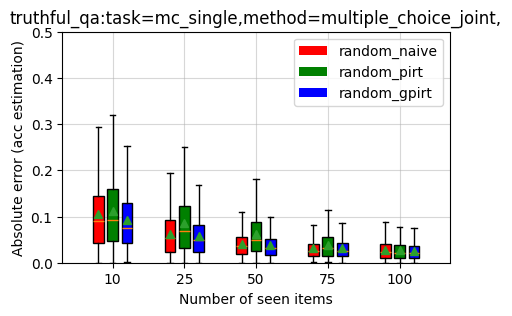

In [39]:
plot_results(results_partial_processed, scenarios.keys())

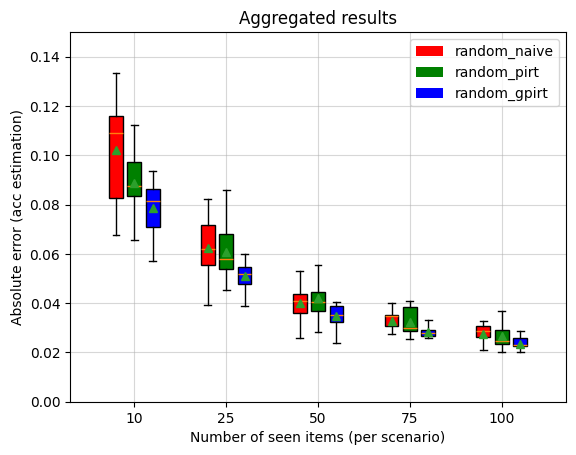

In [40]:
plot_agg_results(results_partial_processed, scenarios.keys())